<a href="https://colab.research.google.com/github/Calex192/Desafio-Telecom-X-parte-2.-Alura-Latam./blob/main/Datos_tratados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Extracción del Archivo Tratado.**

In [94]:
import pandas as pd

url = "https://raw.githubusercontent.com/Calex192/Desafio-Telecom-X-parte-2.-Alura-Latam./refs/heads/main/datos_tratados.csv"
df = pd.read_csv(url)
df.head()


,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges.monthly,charges.total,cuentas_diarias
0,0,0,0,1,1,9,1,no,dsl,no,...,no,yes,yes,no,one year,1,mailed check,65.6,593.30,2.186667
1,0,1,0,0,0,9,1,yes,dsl,no,...,no,no,no,yes,month-to-month,0,mailed check,59.9,542.40,1.996667
2,1,1,0,0,0,4,1,no,fiber optic,no,...,yes,no,no,no,month-to-month,1,electronic check,73.9,280.85,2.463333
3,1,1,1,1,0,13,1,no,fiber optic,no,...,yes,no,yes,yes,month-to-month,1,electronic check,98.0,1237.85,3.266667
4,1,0,1,1,0,3,1,no,fiber optic,no,...,no,yes,yes,no,month-to-month,1,mailed check,83.9,267.40,2.796667


In [95]:
df.dtypes

,0
churn,int64
gender,int64
seniorcitizen,int64
partner,int64
dependents,int64
tenure,int64
phoneservice,int64
multiplelines,object
internetservice,object
onlinesecurity,object


In [96]:
df.isnull().sum()

,0
churn,0
gender,0
seniorcitizen,0
partner,0
dependents,0
tenure,0
phoneservice,0
multiplelines,0
internetservice,0
onlinesecurity,0


In [97]:
## 1. Copiar el DataFrame original para no dañar la versión base
df_clean = df.copy()

In [98]:
# 2. Convertir todas las variables binarias categóricas (yes/no, male/female, etc.)
bin_map = {'yes': 1, 'no': 0, 'male': 1, 'female': 0}
for col in df_clean.columns:
    if df_clean[col].nunique() == 2 and df_clean[col].dtype == 'object':
        df_clean[col] = df_clean[col].str.strip().str.lower().map(bin_map)
print("Columnas binarias:", columnas_binarias)

Columnas binarias: ['churn', 'gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'paperlessbilling']


In [99]:
# 3. One-hot encoding para variables categóricas con más de 2 categorías
categorical_cols = df_clean.select_dtypes(include=['object']).columns
df_clean = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

In [100]:
# 4. Matriz de correlación con churn
correlacion = df_clean.corr()
churn_corr = correlacion['churn'].sort_values(ascending=False)

In [101]:
print("Top 10 variables más correlacionadas con Churn:")
print(churn_corr.head(14))

Top 10 variables más correlacionadas con Churn:
churn                             1.000000
internetservice_fiber optic       0.307463
paymentmethod_electronic check    0.301455
cuentas_diarias                   0.192858
charges.monthly                   0.192858
paperlessbilling                  0.191454
seniorcitizen                     0.150541
streamingtv_yes                   0.063254
streamingmovies_yes               0.060860
multiplelines_yes                 0.040033
phoneservice                      0.011691
gender                           -0.008545
multiplelines_no phone service   -0.011691
deviceprotection_yes             -0.066193
Name: churn, dtype: float64


**Eliminación de Columnas Irrelevantes.**

In [102]:
import numpy as np

# Umbral
threshold = 0.90

# Buscar el número mínimo de componentes que supera el umbral
n_components_threshold = np.argmax(explained_variance_ratio >= threshold) + 1

print(f"Con {n_components_threshold} componentes alcanzas al menos {threshold*100:.0f}% de varianza explicada.")

Con 14 componentes alcanzas al menos 90% de varianza explicada.


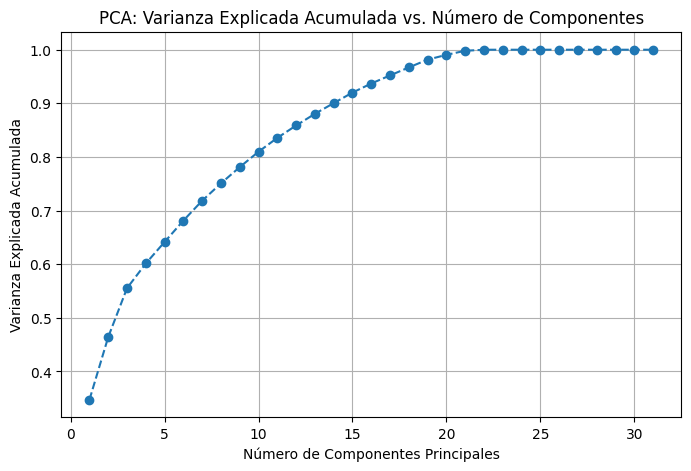

In [103]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

X = df_clean.drop(columns=['churn']) #Definir variable objetivo
scaler = StandardScaler()# Normalizar con Standard Scaler
X_normalized = scaler.fit_transform(X)

# Inicializar PCA sin especificar el número de componentes
pca = PCA()

# Ajustar PCA a los datos estandarizados
pca.fit(X_normalized)

# Calcular la varianza explicada acumulada
explained_variance_ratio = pca.explained_variance_ratio_.cumsum()

# Graficar la varianza acumulada en función del número de componentes
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio)+1), explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('PCA: Varianza Explicada Acumulada vs. Número de Componentes')
plt.grid()
plt.show()


In [104]:
# Variables independientes
X = df_clean.drop(columns=['churn'])

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA con 14 componentes
pca = PCA(n_components=14)
pca.fit(X_scaled)

# Cargas (loadings) absolutas
loadings = pd.DataFrame(
    np.abs(pca.components_.T),  # valores absolutos
    columns=[f'PC{i+1}' for i in range(14)],
    index=X.columns
)

# Importancia global de cada variable = suma de sus pesos en los 14 componentes
variable_importance = loadings.sum(axis=1).sort_values(ascending=False)

# Mostrar las 14 variables más influyentes
print(" 14 variables más influyentes en el PCA:")
print(variable_importance.head(14))

 14 variables más influyentes en el PCA:
seniorcitizen                            2.614180
onlinesecurity_yes                       2.600356
techsupport_yes                          2.462637
paperlessbilling                         2.410247
onlinebackup_yes                         2.377778
multiplelines_yes                        2.305849
paymentmethod_electronic check           2.103867
paymentmethod_credit card (automatic)    2.090015
paymentmethod_mailed check               2.063983
partner                                  1.899303
dependents                               1.829468
contract_one year                        1.768508
streamingmovies_yes                      1.767593
streamingtv_yes                          1.738787
dtype: float64


In [105]:
# Matriz de correlación
correlacion = df_clean.corr()

# Correlación de todas las variables con churn
churn_corr = correlacion['churn'].sort_values(ascending=False)

# Mostrar las 14 variables más correlacionadas con churn
print("Top 14 variables más correlacionadas con Churn:")
print(churn_corr.head(14))


Top 14 variables más correlacionadas con Churn:
churn                             1.000000
internetservice_fiber optic       0.307463
paymentmethod_electronic check    0.301455
cuentas_diarias                   0.192858
charges.monthly                   0.192858
paperlessbilling                  0.191454
seniorcitizen                     0.150541
streamingtv_yes                   0.063254
streamingmovies_yes               0.060860
multiplelines_yes                 0.040033
phoneservice                      0.011691
gender                           -0.008545
multiplelines_no phone service   -0.011691
deviceprotection_yes             -0.066193
Name: churn, dtype: float64


In [107]:
variables_utiles = [
    'churn',
    'internetservice_fiber optic',
    'paymentmethod_electronic check',
    'charges.monthly',
    'paperlessbilling',
    'seniorcitizen',
    'streamingtv_yes',
    'streamingmovies_yes',
    'multiplelines_yes',
    'phoneservice',
    'gender',
    'multiplelines_no phone service',
    'deviceprotection_yes'
]

In [108]:
df_model = df_clean[variables_utiles].copy()

print("Shape original:", df_clean.shape)
print("Shape reducido:", df_model.shape)
df_model.head()

Shape original: (7032, 32)
Shape reducido: (7032, 13)


,churn,internetservice_fiber optic,paymentmethod_electronic check,charges.monthly,paperlessbilling,seniorcitizen,streamingtv_yes,streamingmovies_yes,multiplelines_yes,phoneservice,gender,multiplelines_no phone service,deviceprotection_yes
0,0,False,False,65.6,1,0,True,False,False,1,0,False,False
1,0,False,False,59.9,0,0,False,True,True,1,1,False,False
2,1,True,True,73.9,1,0,False,False,False,1,1,False,True
3,1,True,True,98.0,1,1,True,True,False,1,1,False,True
4,1,True,False,83.9,1,1,True,False,False,1,0,False,False


In [109]:
df_model.to_csv("datos_modelo.csv", index=False)


In [110]:
df_model.isnull().sum()

,0
churn,0
internetservice_fiber optic,0
paymentmethod_electronic check,0
charges.monthly,0
paperlessbilling,0
seniorcitizen,0
streamingtv_yes,0
streamingmovies_yes,0
multiplelines_yes,0
phoneservice,0
